Primero llamamos a las librerías que necesitaremos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery


In [3]:
import os
project_id = os.environ.get("GOOGLE_CLOUD_PROJECT")
api_json = os.environ.get("GOOGLE_APPLICATION_CREDENTIALS")


In [4]:
client = bigquery.Client(project_id)

In [5]:
# Construct a reference to the "covid19_open_data" dataset
dataset_ref = client.dataset("covid19_open_data", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [6]:
# List all the tables in the "covid19_open_data" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset
for table in tables:  
    print(table.table_id)

compatibility_view
covid19_open_data


In [7]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("covid19_open_data")

# API request - fetch the table
table = client.get_table(table_ref)

In [8]:
#print information on all the columns in the "full" table
table.schema

[SchemaField('location_key', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('date', 'DATE', 'NULLABLE', None, None, (), None),
 SchemaField('place_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('wikidata_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('datacommons_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('country_code', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('country_name', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('iso_3166_1_alpha_2', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('iso_3166_1_alpha_3', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('aggregation_level', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('new_confirmed', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('new_deceased', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('cumulative_confirmed', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('cumulat

In [9]:
#print information of the first five rows
client.list_rows(table, max_results=5).to_dataframe()

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,cumulative_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,location_geometry
0,AR,2020-02-28,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
1,AR,2020-04-04,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
2,AR,2022-04-18,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
3,AR,2021-03-03,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
4,AR,2021-12-13,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)


We pick 5 elements to see what columns are not null 

In [10]:

query = """
SELECT *
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE country_name = 'United States of America'
    AND NOT EXISTS (
        SELECT 1
        FROM UNNEST([CAST(date AS STRING), CAST(country_name AS STRING), CAST(cumulative_vaccine_doses_administered AS STRING),CAST(population AS STRING) , CAST(cumulative_deceased AS STRING), CAST(cumulative_deceased AS STRING), CAST(new_confirmed AS STRING), CAST(population_density AS STRING)]) AS value
        WHERE value IS NULL
    )
ORDER BY date DESC
LIMIT 1000;
"""
dry_run_config = bigquery.QueryJobConfig(dry_run=True)
dry_run_query_job = client.query(query, job_config=dry_run_config)
print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))
query_job = client.query(query)
results = query_job.to_dataframe()
# results




This query will process 12576008229 bytes.


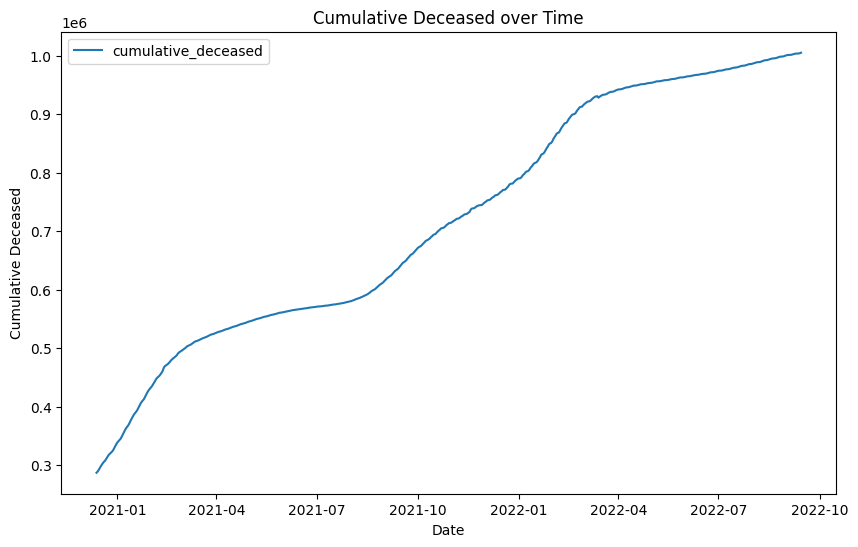

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
results.plot(x='date', y='cumulative_deceased', ax=ax, title='Cumulative Deceased over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Deceased')
plt.title('Cumulative Deceased over Time')
plt.show()


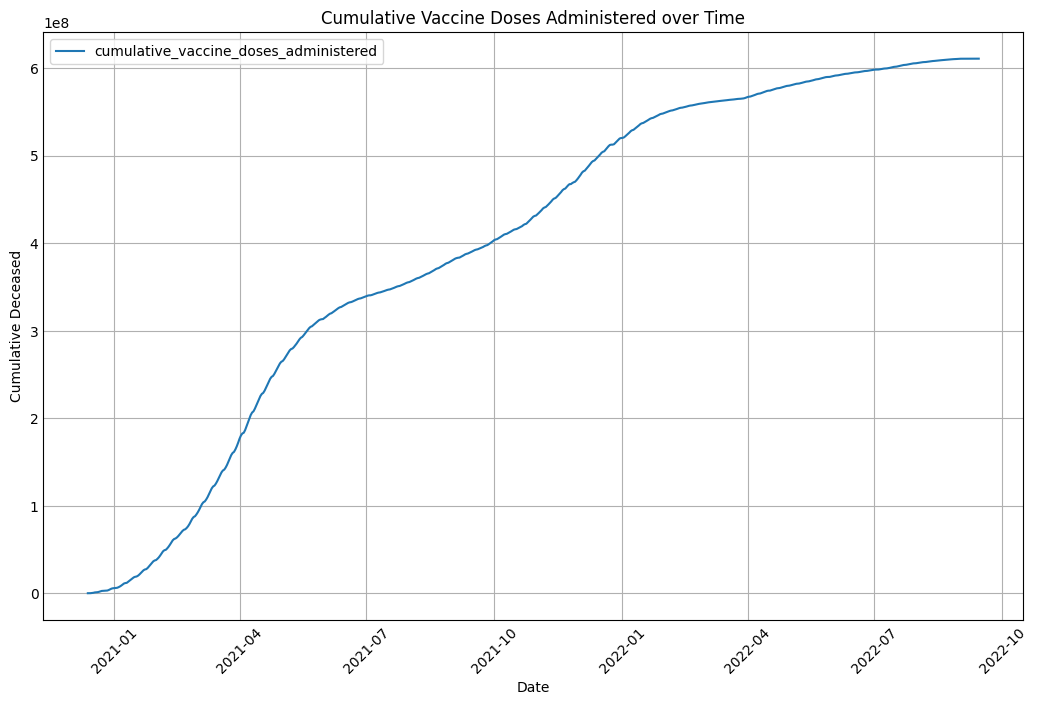

In [24]:

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
results.plot(x='date', y='cumulative vaccine doses administered', ax=ax, title='Cumulative Vaccine Doses Administered over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Deceased')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.show()


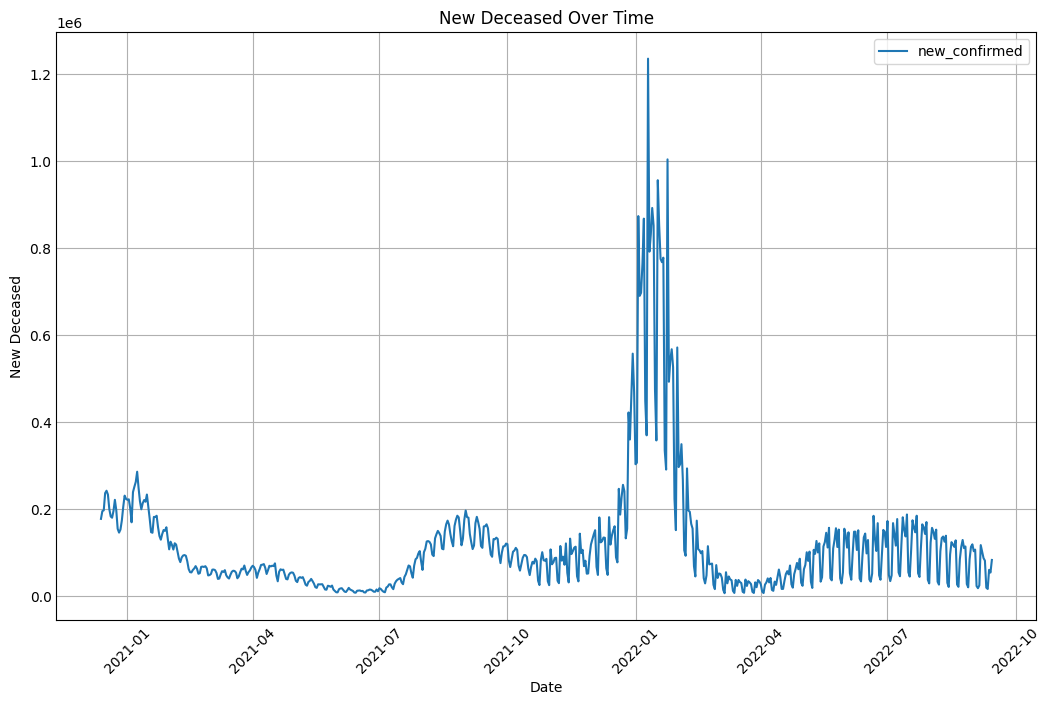

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
results.plot(x='date', y='new_confirmed', ax=ax, title='New Deceased Over Time')
plt.xlabel('Date')
plt.ylabel('New Deceased')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees

plt.show()

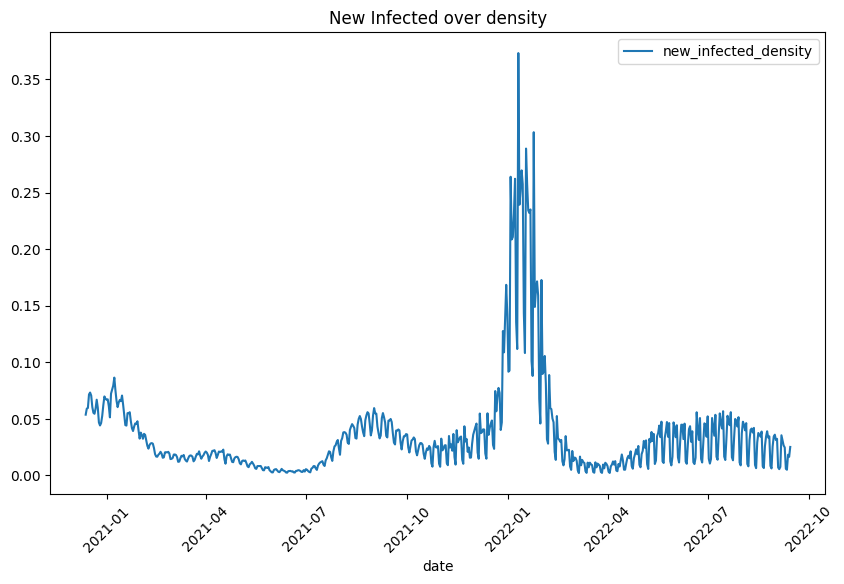

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
results['new_infected_density'] =  results['new_confirmed']/results['population'] *100
results.plot(x='date', y='new_infected_density',ax=ax, title='New Infected density')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.show()

Sure! Could you please provide the code that you would like me to add documentation comments to?

Sure! Could you please provide the code that you would like me to add documentation comments to?

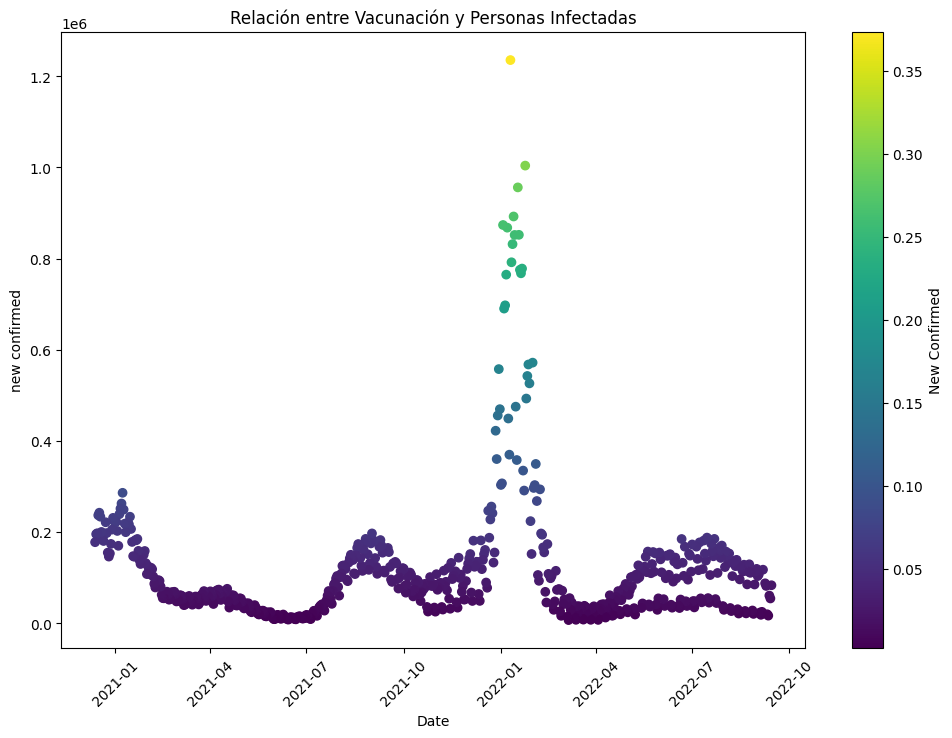

In [20]:
# Crear el scatter plot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figsize as per your requirement
scatter = plt.scatter(results['date'], results['new_confirmed'], c=results['new_infected_density'], cmap='viridis')

# Agregar etiquetas y título
plt.xlabel('Date')
plt.ylabel('new confirmed')
plt.title('Relación entre Vacunación y Personas Infectadas')

# Agregar color a los puntos según la cantidad de personas infectadas
plt.colorbar(scatter, label='New Confirmed')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
# Mostrar el plot
plt.show()


TypeError: float() argument must be a string or a number, not 'datetime.date'